In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
from collections import namedtuple
import seaborn as sns
sns.set()
%matplotlib inline

In [121]:
#path = glob.glob("../logs/MiniGrid-FourRooms-v0/*/*/*/train/results.csv
#path = glob.glob("../logs/MiniGrid-Empty-6x6-v0/*/*/*/train/results.csv")
path = glob.glob("../logs/MiniGrid-Unlock-v0/*/*/*/train/results.csv")

In [122]:
def smooth(x,w=.999):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

In [123]:
models = {}

In [124]:
for p in path:
    env, agent, seed = p.split('/')[2:5]
    results = pd.read_csv(p, index_col=0)
    if agent not in models.keys():
        models[agent] = {}
    models[agent][seed] = results

In [125]:
list(models.keys())

['dqneu', 'qneu', 'dqn', 'gl', 'mirl', 'sql']

In [126]:
results = {}
for k,v in models.items():
    rw = [df.rw for df in v.values()]
    rw = np.array(rw).reshape((-1,4)).mean(axis=1)
    results[k] = rw

In [127]:
results =pd.DataFrame(results).apply(smooth, axis=0)

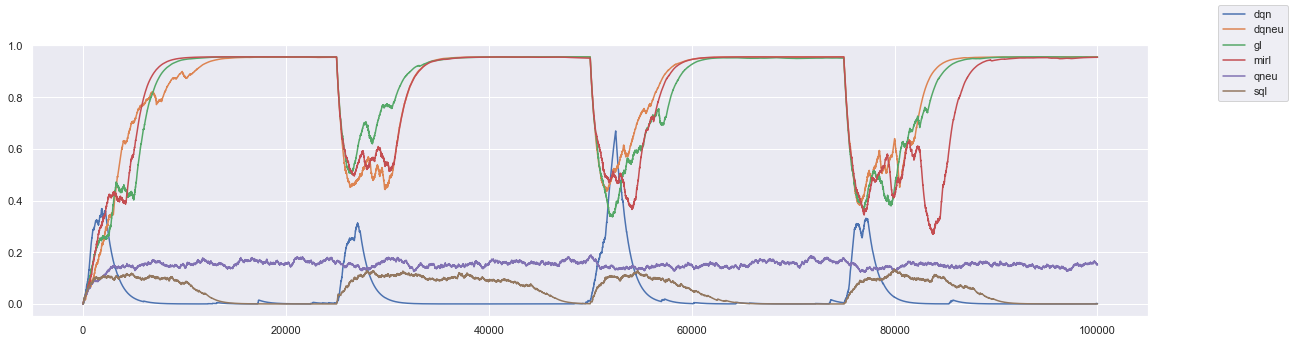

In [120]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(results.values)
fig.legend(results.columns.tolist())
fig.savefig(env +'.png')

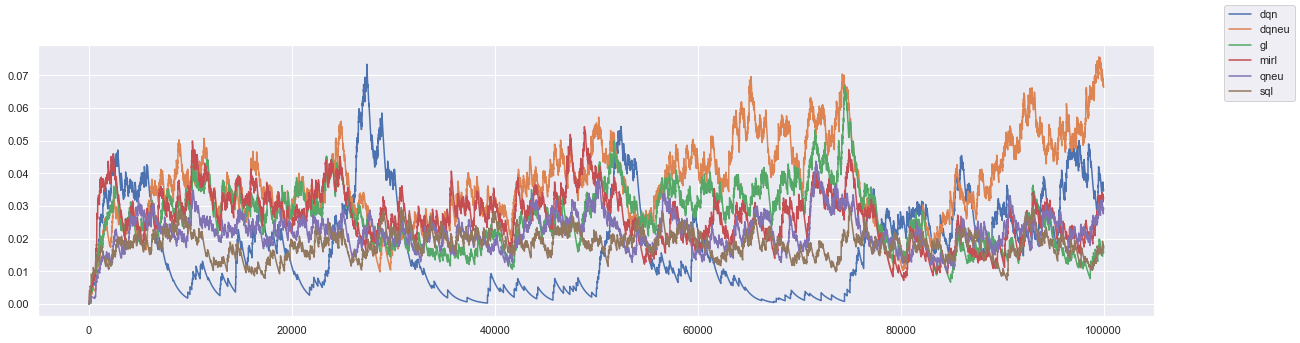

In [112]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(results.values)
fig.legend(results.columns.tolist())
fig.savefig(env +'.png')

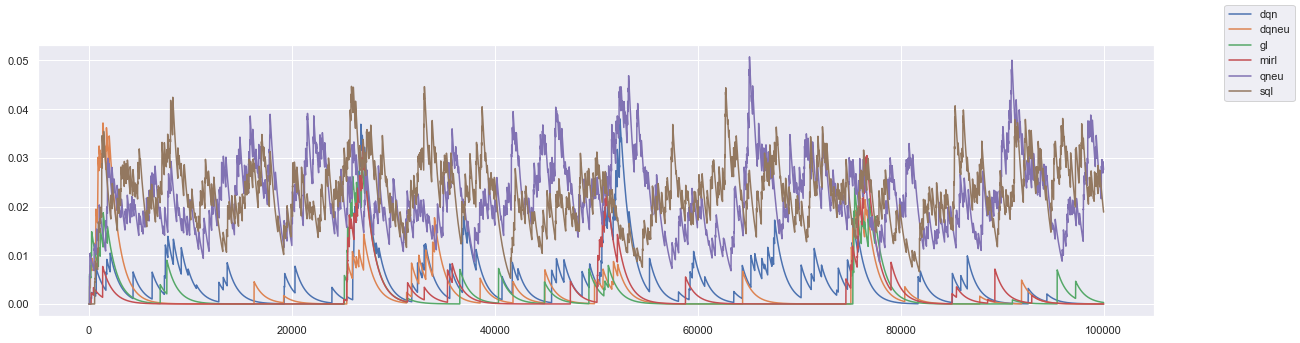

In [128]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(results.values)
fig.legend(results.columns.tolist())
fig.savefig(env +'.png')

In [ ]:
def load_trajectory(path):
    df = pd.read_pickle(path)

    keys = ("s1", "a", "r", "s2", "d")
    memory = {k:[] for k in keys}

    s1,a,s2,r,dones = [], [], [], [],[]
    for d in df:
        for idx, k in enumerate(memory.keys()):
            memory[k].append(d[idx])

    memory = {k:np.array(v) for k,v in memory.items()}
    return memory